In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("muted", color_codes=True)

In [104]:
df = pd.read_csv('mpg.csv')

# Create categorical variables for weight range and year range
df['weight-range_ord'] = pd.Categorical(df['weight-range']).codes
df['year-range_ord'] = pd.Categorical(df['year-range']).codes

df.head()

,weight-range,year-range,name,model-year,mpg,weight,percent-weight-front,length,width,height,cylinders,eng-displacement,trans,trans-speed,weight-range_ord,year-range_ord
0,1500-2000,1988-1992,Chevrolet Sprint,1988,47.0,1562.0,59.0,144.49,60.24,53.15,3,1.0,0,5,0,0
1,2000-2500,1988-1992,Chevrolet Sprint,1989,39.0,1562.0,59.0,144.49,60.24,53.15,3,1.0,0,5,1,0
2,1500-2000,1993-1997,Suzuki Swift,1993,40.0,1648.0,60.0,147.64,62.20,53.15,3,1.0,0,5,0,1
3,1500-2000,2009-2015,Smart Fortwo Brabus,2012,35.0,1653.0,43.0,106.30,61.42,60.63,3,1.0,0,5,0,4
4,2000-2500,1988-1992,Suzuki Swift,1989,40.0,1661.0,59.0,146.06,62.20,53.15,3,1.0,0,5,1,0


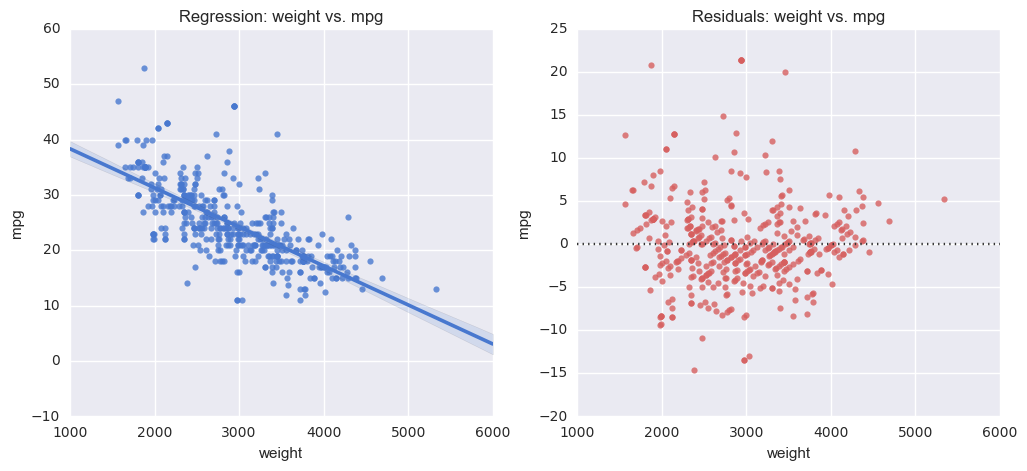

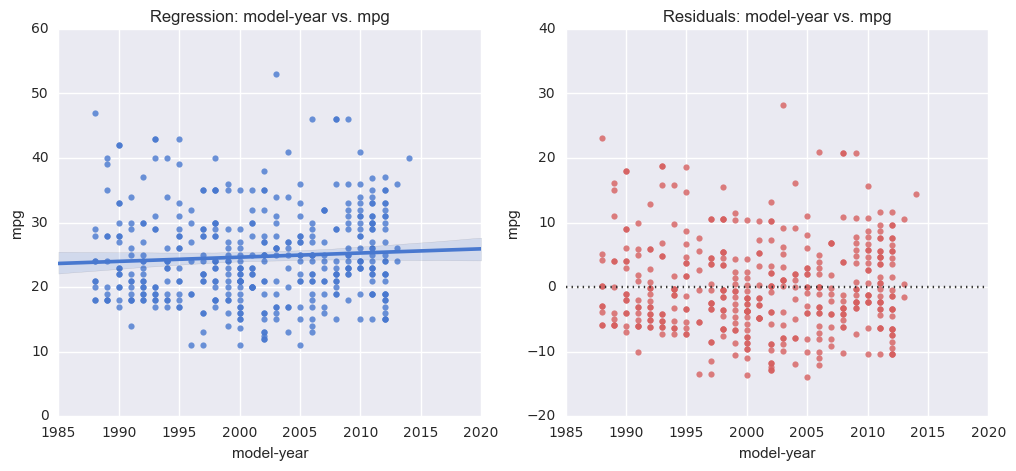

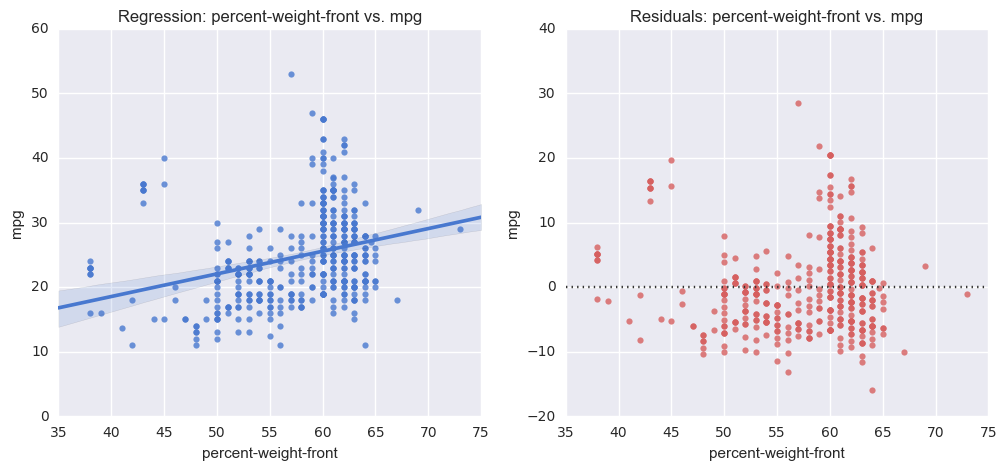

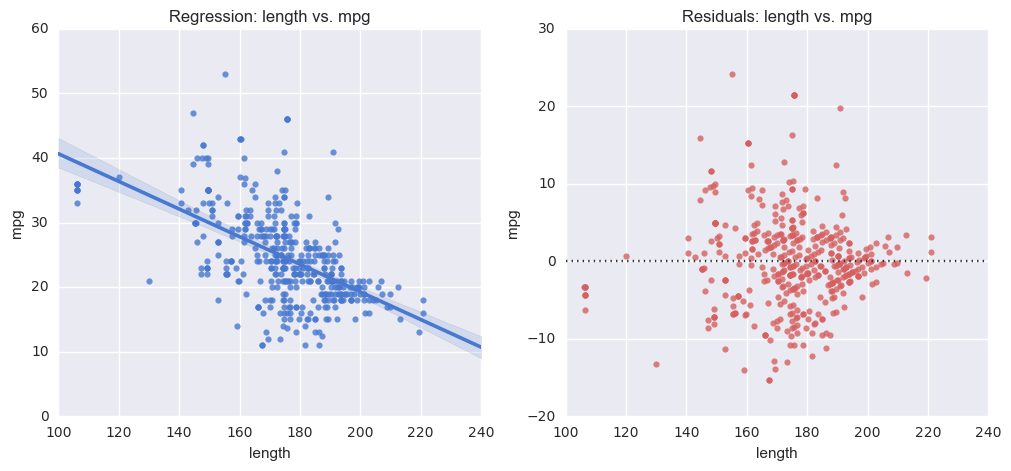

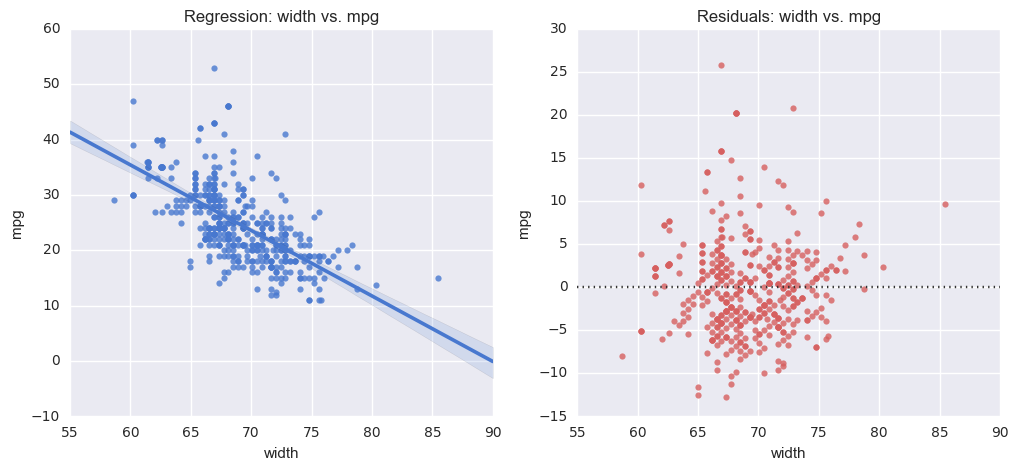

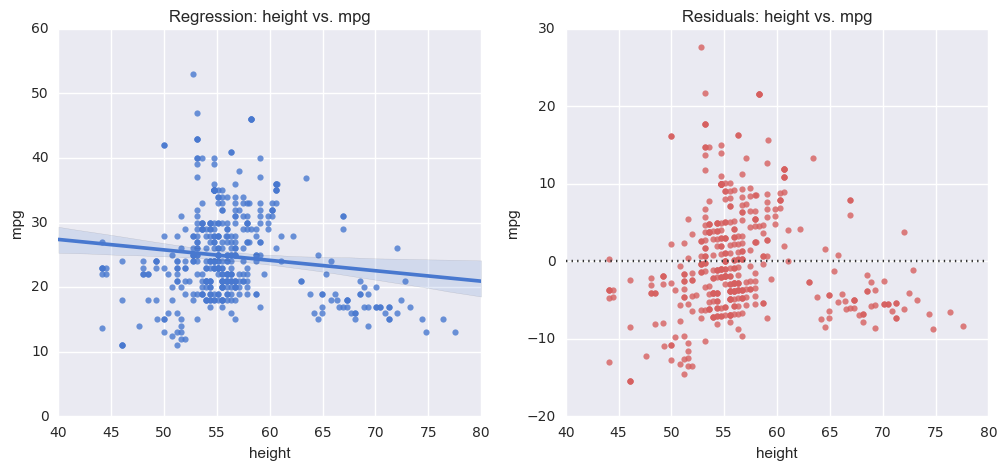

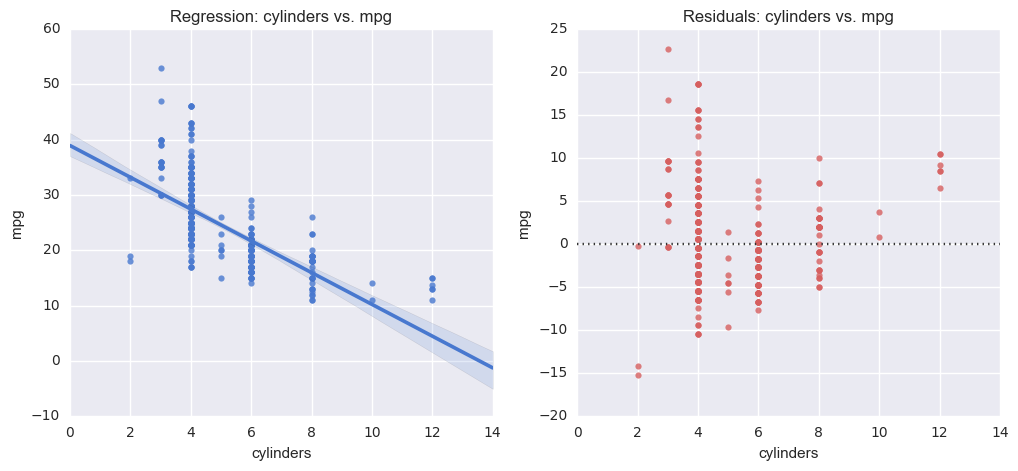

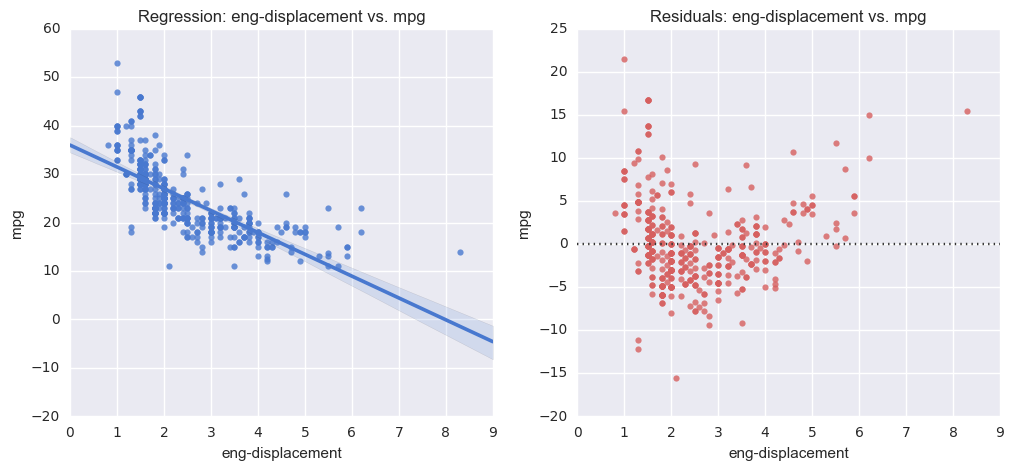

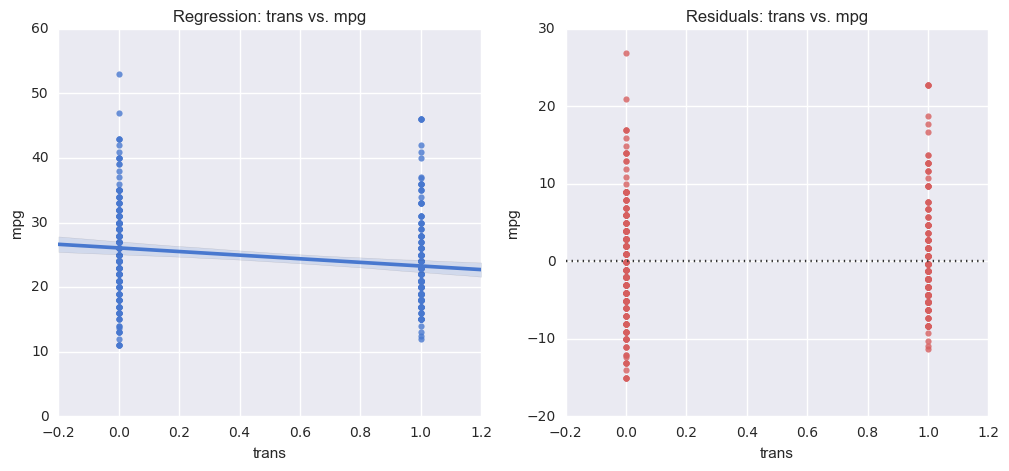

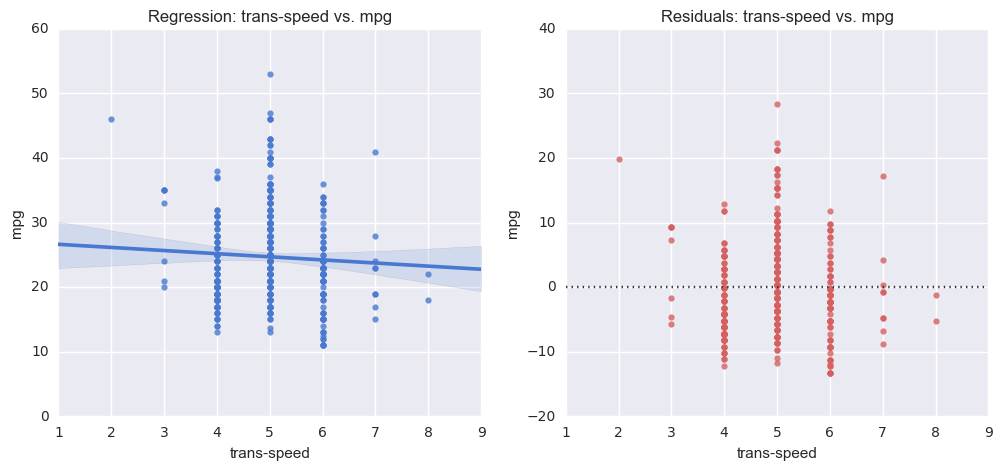

In [93]:
def plot_regression(k):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title('Regression: {} vs. mpg'.format(k))
    sns.regplot(x=k, y='mpg', data=df, color='b')
    plt.subplot(1, 2, 2)
    plt.title('Residuals: {} vs. mpg'.format(k))
    sns.residplot(x=k, y='mpg', data=df, color='r')
    plt.show()
    
keys = ['weight', 'model-year', 'percent-weight-front', 'length',
       'width', 'height', 'cylinders', 'eng-displacement', 'trans', 'trans-speed']

for k in keys:
    plot_regression(k)

In [89]:
keys = [
    'weight',
#     'weight-range_ord',
#     'year-range_ord',
#     'model-year',
#     'length',
    'width', 
#     'height', 
    'cylinders',
#     'eng-displacement', 
#     'trans',
#     'trans-speed',
]

X = df[keys]
y = df['mpg']
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     179.0
Date:                Sun, 19 Nov 2017   Prob (F-statistic):           9.68e-75
Time:                        23:07:04   Log-Likelihood:                -1257.7
No. Observations:                 424   AIC:                             2523.
Df Residuals:                     420   BIC:                             2540.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         50.7929      6.361      7.985      0.000        38.290    63.296
weight        -0.0044      0.001     -7.256      0.000        -0.006    -0.003
width         -0.0834      0.113     -0.738      0.461        -0.305     0.139
cylinders     -1.4842      0.193     -7.687      0.000        -1.864    -1.105
==============================================================================
Omnibus:                      113.104   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.235
Skew:                           1.250   Prob(JB):                     8.75e-72
Kurtosis:                       6.504   Cond. No.                     8.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

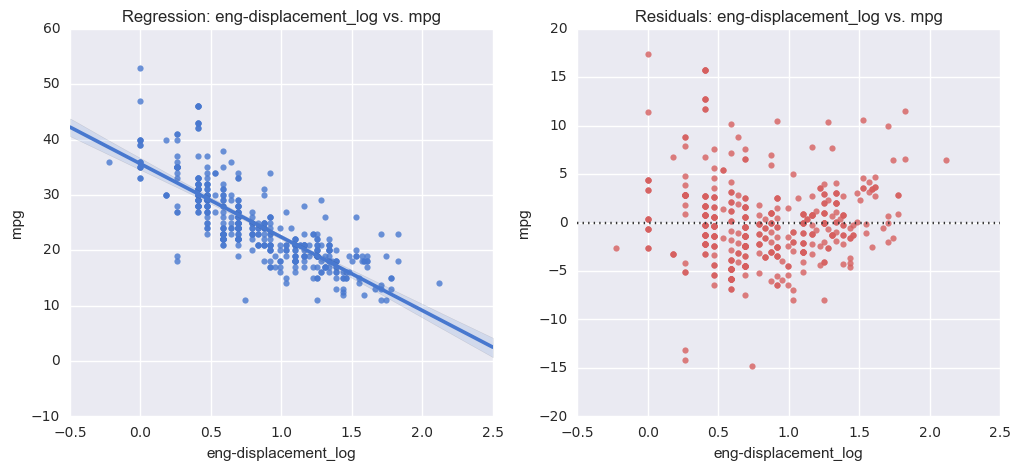

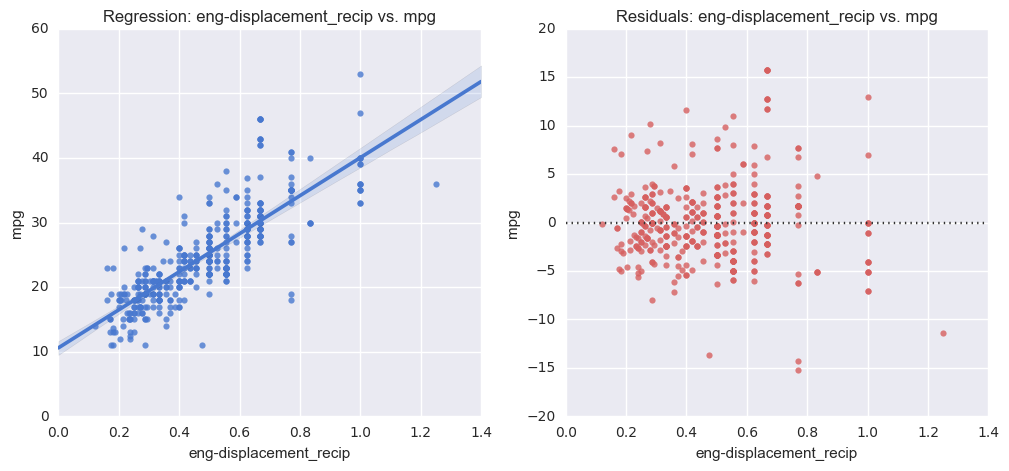

In [109]:
df['eng-displacement_log'] = [x for x in map(lambda x: math.log(x), df['eng-displacement'])]
plot_regression('eng-displacement_log')

df['eng-displacement_recip'] = [x for x in map(lambda x: 1/x, df['eng-displacement'])]
plot_regression('eng-displacement_recip')

In [110]:
keys = [
    'weight',
#     'weight-range_ord',
#     'year-range_ord',
#     'model-year',
#     'length',
#     'width', 
#     'height', 
#     'cylinders',
#     'eng-displacement_log',
      'eng-displacement_recip',
#     'eng-displacement', 
#     'trans',
#     'trans-speed',
]

X = df[keys]
y = df['mpg']
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     420.8
Date:                Sun, 19 Nov 2017   Prob (F-statistic):          3.88e-101
Time:                        23:35:12   Log-Likelihood:                -1199.4
No. Observations:                 424   AIC:                             2405.
Df Residuals:                     421   BIC:                             2417.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
const                     13.5400      2.303      5.879      0.000         9.013    18.067
weight                    -0.0007      0.001     -1.310      0.191        -0.002     0.000
eng-displacement_recip    27.4400      1.843     14.886      0.000        23.817    31.063
==============================================================================
Omnibus:                       76.474   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.890
Skew:                           0.849   Prob(JB):                     8.00e-48
Kurtosis:                       6.065   Cond. No.                     4.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

const                     13.539993
weight                    -0.000673
eng-displacement_recip    27.439959
dtype: float64